[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [77]:
import requests
from tqdm.auto import tqdm
from collections import defaultdict
import pandas as pd
import sqlite3

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

## Список объектов

In [2]:
# offset_ = 1
# limit_ = 1000
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
# res = requests.get(url)
# objects_data = res.json()

# Данные по определенному объекту

In [3]:
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'

In [2]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 0
        self.limit_ = 1
        self.sortField_ = 'devId.devShortCleanNm'
        self.sortType_ = 'asc'
        self.objStatus_ = '0'
        self.objects_data = None
        self.ids = []
        self.data = pd.DataFrame()
        
    def get_ids(self):
            url = f'https://наш.дом.рф/сервисы/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField={self.sortField_}&sortType={self.sortType_}&objStatus={self.objStatus_}'
            res = requests.get(url)
            reestr = res.json()
            total = reestr.get('data').get('total')
            for i in tqdm(range(total)):
                url = f'https://наш.дом.рф/сервисы/api/kn/object?offset={i}&limit={self.limit_}&sortField={self.sortField_}&sortType={self.sortType_}&objStatus={self.objStatus_}'
                res = requests.get(url)
                reestr = res.json()
                obj = [reestr.get('data').get('list')[0]['objId']]
                self.ids.extend(obj)
            print("ID строящихся домов собраны!")

    def get_object(self):
        for id in tqdm(self.ids):
            url = f'https://наш.дом.рф/сервисы/api/object/{id}'
            res = requests.get(url)
            r = res.json()
            obj = r.get('data')
            df = pd.json_normalize(obj)
            self.data = self.data.append(df, ignore_index=True)
        print("Создан DataFrame")
        return self.data
    

    def get_df_with_objects(self):
        self.get_ids()
        self.objects_data = self.get_object()
        return self.objects_data

In [3]:
nashd_loader = DomIdLoader()
nashdf = nashd_loader.get_df_with_objects()

  0%|          | 0/64 [00:00<?, ?it/s]

ID строящихся домов собраны!


  0%|          | 0/64 [00:00<?, ?it/s]

Создан DataFrame


In [4]:
nashdf.head()

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,29679,124647,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",0,2024-12-31,Другое,Без отделки,Нет,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13399,28141,72,"г Тюмень, ул Профсоюзная, д. 56",0,2024-12-31,Другое,Без отделки,Нет,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
class Saver:
    def __init__(self, data):
        self.data = data
                
    def save_csv(self):
        self.data.to_csv('name.csv', index = False)

    def save_xl(self):
        self.data.to_excel('name.xlsx')
    
    def save_pkl(self):
        self.data.to_pickle('name.pkl')
    
    def save_sql(self):
        conn = sqlite3.connect('names.db')  
        cur = conn.cursor()
        self.data = self.data.applymap(str)
        self.data.to_sql('names', conn)

In [10]:
t = Saver(nashdf)

In [8]:
t.save_csv()
t.save_xl()
t.save_pkl()

In [9]:
t.save_sql()

In [64]:
 class ObjectInfoExtractor:
    def __init__(self, data):
        self.data = data
        
    def df_converter(self):
        col = ['id', 'developer.devShortCleanNm', 'region', 'developer.regRegionDesc', 'address', 'objLkClassDesc',
     'wallMaterialShortDesc', 'objLkFinishTypeDesc', 'objReady100PercDt', 'soldOutPerc', 'objElemParkingCnt',
     'objElemLivingCnt', 'objSquareLiving',  'floorMax', 'objPriceAvg']
        self.data = self.data[col]
        self.data.rename(columns = {'id': 'id дома', 'developer.devShortCleanNm': 'застройщик', 'region': 'номер региона',
                      'developer.regRegionDesc': 'название региона', 'address': 'адрес дома',
                      'objLkClassDesc': 'класс недвижимости', 'wallMaterialShortDesc': 'материал стен',
                      'objLkFinishTypeDesc': 'тип отделки', 'objReady100PercDt': 'ввод в эксплуатацию',
                      'soldOutPerc': 'распроданность квартир', 'objElemParkingCnt':'количество мест в паркинге',
                       'objElemLivingCnt': 'количество квартир', 'objSquareLiving': 'жилая площадь', 
                      'floorMax': 'количество этажей', 'objPriceAvg': 'средняя цена за 1 м²'}, inplace=True)
        
        self.data['ввод в эксплуатацию'] = pd.to_datetime(self.data['ввод в эксплуатацию'], dayfirst=True)
        self.data['количество мест в паркинге'].fillna(0, inplace = True)
        self.data['распроданность квартир'].fillna(0, inplace = True)
        return self.data

    
    def df_sktb(self):
        print('выберем Смоленскую, Калужскую, Тверьскую и Брянскую области')
        self.d = self.data
        self.d = self.d.loc[(self.d['номер региона'] == 61) | (self.d['номер региона'] == 72) | 
                (self.d['номер региона'] == 62) | (self.d['номер региона'] == 23)]
        self.d = self.d.reset_index()
        self.d = self.d.drop(['index'],axis=1)
        return self.d
    
    def df_infa(self):
        print(self.data.info())
        
        

In [65]:
y = ObjectInfoExtractor(nashdf)

In [66]:
y.df_converter()

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,29679,212-2,61,Ростовская область,г Таганрог,Комфорт,Другое,Под ключ,2020-03-31,0.000000,0,18,1519.00,NaN,NaN
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.407164,31,68,6293.78,20.0,53109.0
2,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12.0,45523.0
3,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1.0,50768.0
4,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1.0,50768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,41617,АЛЬФА,23,Краснодарский край,"г Краснодар, Район п. Знаменский и п. Зеленопо...",Комфорт,Другое,Под чистовую,2023-03-31,1.000000,0,0,0.00,2.0,63000.0
60,41614,АЛЬФА,23,Краснодарский край,"г Краснодар, Район п. Знаменский и п. Зеленопо...",Комфорт,Монолит-кирпич,Под чистовую,2023-12-31,0.226637,0,192,12096.00,17.0,96699.0
61,45256,АЛЬФА,62,Рязанская область,"г Рязань, Кальное (Советский район)",Типовой,Монолит-кирпич,Без отделки,2023-12-31,0.848824,0,398,22581.52,28.0,54450.0
62,41618,АЛЬФА,23,Краснодарский край,"г Краснодар, Район п. Знаменский и п. Зеленопо...",Комфорт,Монолит-кирпич,Под чистовую,2024-03-31,0.005332,0,360,16417.44,14.0,98000.0


In [67]:
y.df_sktb()

выберем Смоленскую, Калужскую, Тверьскую и Брянскую области


,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,29679,212-2,61,Ростовская область,г Таганрог,Комфорт,Другое,Под ключ,2020-03-31,0.000000,0,18,1519.00,NaN,NaN
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.407164,31,68,6293.78,20.0,53109.0
2,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12.0,45523.0
3,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1.0,50768.0
4,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1.0,50768.0
5,13391,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная",Элитный,Другое,По желанию заказчика,2022-12-31,0.450622,41,44,4297.44,12.0,55893.0
6,39176,АВА ДЕВЕЛОПМЕНТ ПЛЮС,23,Краснодарский край,"г Краснодар, улица Валерия Гассия, д. 4/7, лит...",Комфорт,Другое,По желанию заказчика,2024-09-30,0.287657,0,198,11535.60,25.0,91456.0
7,39174,АВА ДЕВЕЛОПМЕНТ ПЛЮС,23,Краснодарский край,"г Краснодар, улица Валерия Гассия, д. 4/7, лит...",Комфорт,Другое,По желанию заказчика,2022-09-30,0.583338,0,616,33958.00,25.0,99388.0
8,39175,АВА ДЕВЕЛОПМЕНТ ПЛЮС,23,Краснодарский край,"г Краснодар, улица Валерия Гассия, д. 4/7, лит...",Комфорт,Другое,По желанию заказчика,2023-06-30,0.276431,0,396,21932.80,25.0,85542.0
9,27049,АВА-ДЕВЕЛОПМЕНТ,23,Краснодарский край,"город Краснодар, улица Уральская, д. 75/6",Бизнес,Монолит-кирпич,Другое,2022-12-31,0.220906,66,0,0.00,16.0,142498.0


In [69]:
# y.df_infa()

In [82]:
class Visualizer:
    def __init__(self, data):
        self.data = data

    def make_boxplot(self):
        print('количество строящихся домов по регионам')
        g1 = self.data['номер региона'].value_counts()
        g1.plot(kind='bar')
        plt.xlabel('регион')
        plt.ylabel('количество домов')
        plt.title("Количество строящихся домов по регионам")
        plt.show()
    
        
    def make_pie(self):
        g = (self.data.groupby(self.data['номер региона'])[['жилая площадь']].sum()).sort_values('жилая площадь')
        v = g['жилая площадь']
        labels = g.index
        explode = [0, 0.1, 0, 0.2]
        plt.pie(v, labels=labels, explode=explode, autopct="%1.1f%%")
        plt.title("Объемы вводимого жилья по регионам")
        plt.show()

In [83]:
e = y.df_sktb()
o = Visualizer(e)

выберем Смоленскую, Калужскую, Тверьскую и Брянскую области


количество строящихся домов по регионам


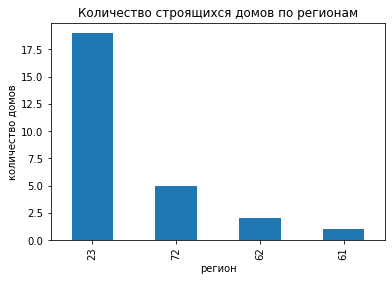

In [84]:
o.make_boxplot()

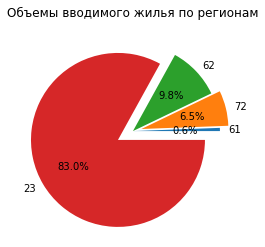

In [85]:
o.make_pie()